In [11]:
import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc
import pprint

In [12]:
df_train = pd.read_csv('./houseprices/train.csv')
df_test  = pd.read_csv('./houseprices/test.csv')

In [3]:
target_log = np.log1p(df_train['SalePrice'])
target_log.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [4]:
#EDA depending on a type of features

In [5]:
df_train_num = df_train.select_dtypes(include=[np.number])
df_train_obj = df_train.select_dtypes(include=[np.object])

df_test_num = df_test.select_dtypes(include=[np.number])
df_test_obj = df_test.select_dtypes(include=[np.object])

In [7]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
dict_type = {}
for i in df_train.columns :
    if i[0:2] in dict_type :
        dict_type[i[0:2]].append(i)
    else :
        dict_type[i[0:2]]=[i]
pprint.pprint(dict_type)

{'1s': ['1stFlrSF'],
 '2n': ['2ndFlrSF'],
 '3S': ['3SsnPorch'],
 'Al': ['Alley'],
 'Be': ['BedroomAbvGr'],
 'Bl': ['BldgType'],
 'Bs': ['BsmtQual',
        'BsmtCond',
        'BsmtExposure',
        'BsmtFinType1',
        'BsmtFinSF1',
        'BsmtFinType2',
        'BsmtFinSF2',
        'BsmtUnfSF',
        'BsmtFullBath',
        'BsmtHalfBath'],
 'Ce': ['CentralAir'],
 'Co': ['Condition1', 'Condition2'],
 'El': ['Electrical'],
 'En': ['EnclosedPorch'],
 'Ex': ['Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond'],
 'Fe': ['Fence'],
 'Fi': ['Fireplaces', 'FireplaceQu'],
 'Fo': ['Foundation'],
 'Fu': ['FullBath', 'Functional'],
 'Ga': ['GarageType',
        'GarageYrBlt',
        'GarageFinish',
        'GarageCars',
        'GarageArea',
        'GarageQual',
        'GarageCond'],
 'Gr': ['GrLivArea'],
 'Ha': ['HalfBath'],
 'He': ['Heating', 'HeatingQC'],
 'Ho': ['HouseStyle'],
 'Id': ['Id'],
 'Ki': ['KitchenAbvGr', 'KitchenQual'],
 'La': ['LandContour', 'LandSlope'],
 'Lo': ['

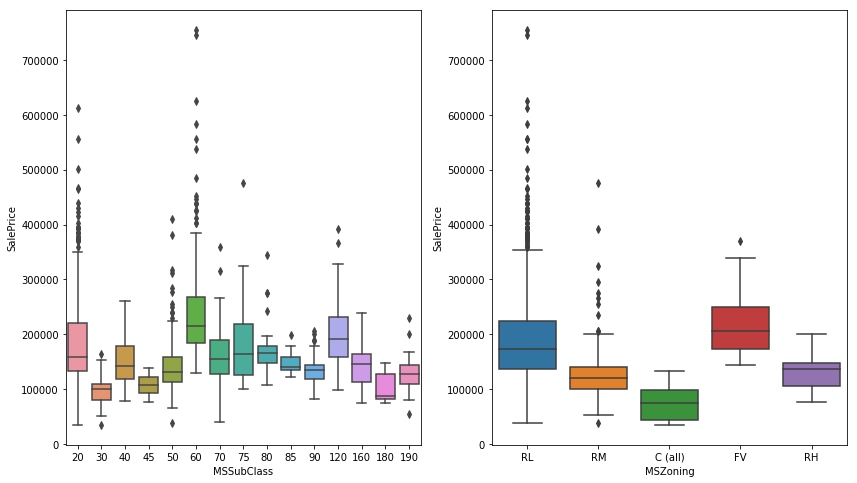

In [18]:
dict_type['MS']
f, ax = plt.subplots(1,2,figsize=(14, 8))
sns.boxplot(x="MSSubClass",y="SalePrice",data=pd.concat([df_train['SalePrice'], df_train['MSSubClass']], axis=1), ax=ax[0])
sns.boxplot(x="MSZoning",y="SalePrice",data=pd.concat([df_train['SalePrice'], df_train['MSZoning']], axis=1), ax=ax[1])

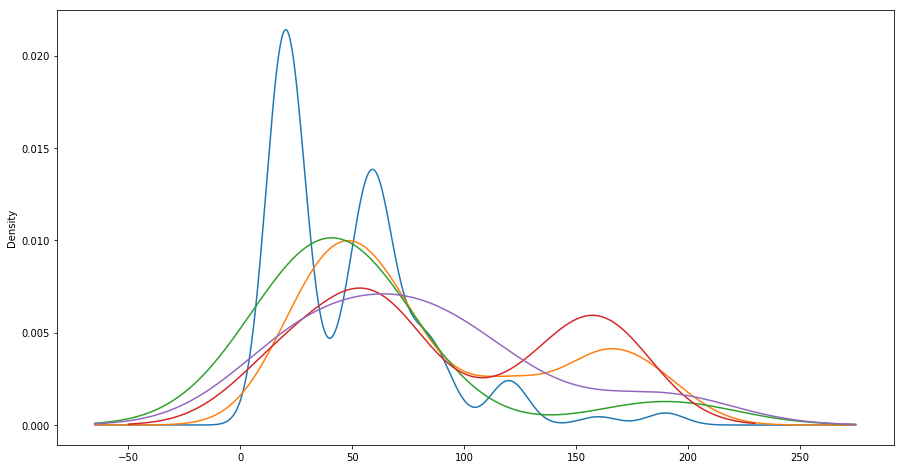

In [22]:
plt.figure(figsize=(15,8))
df_train['MSSubClass'][df_train['MSZoning'] == 'RL'].plot(kind='kde')
df_train['MSSubClass'][df_train['MSZoning'] == 'RM'].plot(kind='kde')
df_train['MSSubClass'][df_train['MSZoning'] == 'C (all)'].plot(kind='kde')
df_train['MSSubClass'][df_train['MSZoning'] == 'FV'].plot(kind='kde')
df_train['MSSubClass'][df_train['MSZoning'] == 'RH'].plot(kind='kde')